# Accessing trajectory data

Within the folder for each float there is also a netCDF file with the data during the time the float was drifting, this is the data not included during the profiling part of the cycle. 

First, import libraries:

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
Rtraj = xr.open_dataset('../../Data/dac/coriolis/6901254/6901254_Rtraj.nc')

In [3]:
Rtraj

<xarray.Dataset> Size: 1MB
Dimensions:                              (N_PARAM: 3, N_MEASUREMENT: 4289,
                                          N_CYCLE: 66, N_HISTORY: 1043)
Dimensions without coordinates: N_PARAM, N_MEASUREMENT, N_CYCLE, N_HISTORY
Data variables: (12/102)
    DATA_TYPE                            object 8B ...
    FORMAT_VERSION                       object 8B ...
    HANDBOOK_VERSION                     object 8B ...
    REFERENCE_DATE_TIME                  object 8B ...
    DATE_CREATION                        object 8B ...
    DATE_UPDATE                          object 8B ...
    ...                                   ...
    HISTORY_PARAMETER                    (N_HISTORY) object 8kB ...
    HISTORY_PREVIOUS_VALUE               (N_HISTORY) float32 4kB ...
    HISTORY_INDEX_DIMENSION              (N_HISTORY) object 8kB ...
    HISTORY_START_INDEX                  (N_HISTORY) float64 8kB ...
    HISTORY_STOP_INDEX                   (N_HISTORY) float64 8kB ...
    HISTORY_QCTEST                       (N_HISTORY) object 8kB ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2019-01-15T11:25:20Z creation; 2020-06-25T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.1
    Conventions:                  Argo-3.1 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_035b
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

once again the netCDF includes all the meta data to understand the data.
Let's bgin by plotting the actual trayectory of the float.

In [4]:
import cartopy.crs as ccrs
import cartopy

we use [cartopy](https://scitools.org.uk/cartopy/docs/latest/), so we can plot the coastile and the land:

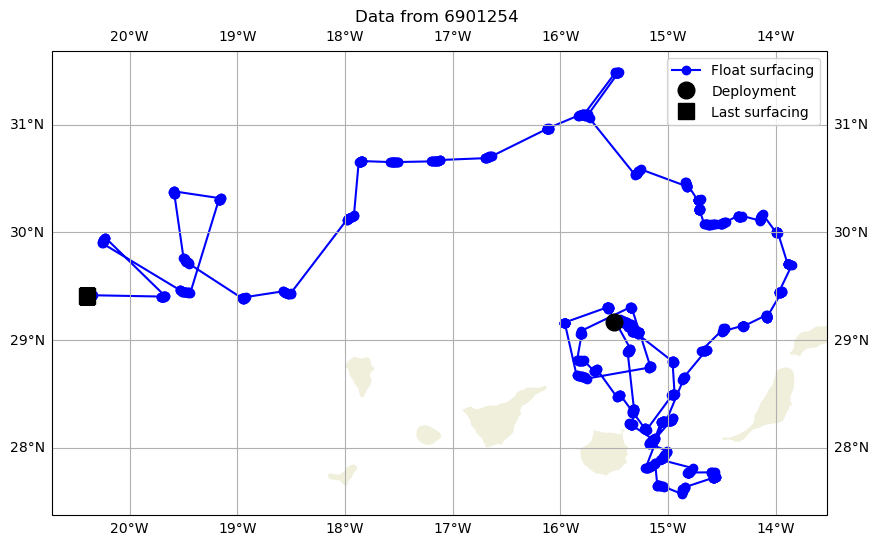

In [5]:
lon=Rtraj.LONGITUDE[~np.isnan(Rtraj.LONGITUDE) & ~np.isnan(Rtraj.LATITUDE)]
lat=Rtraj.LATITUDE[~np.isnan(Rtraj.LONGITUDE) & ~np.isnan(Rtraj.LATITUDE)]

fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon,lat,'-bo',label='Float surfacing')
ax.plot(lon[0],lat[0],'ok',markersize=12,label='Deployment')
ax.plot(lon[-1],lat[-1],'sk',markersize=12,label='Last surfacing')

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='white')
ax.set_title(f"Data from {Rtraj.PLATFORM_NUMBER.values.astype(str)}")
ax.legend()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False);

a blue dot for each time the float reached the surface.

We can also plot the observations of Temperature and Salinity, in a TS diagram, during the drifting of the float:

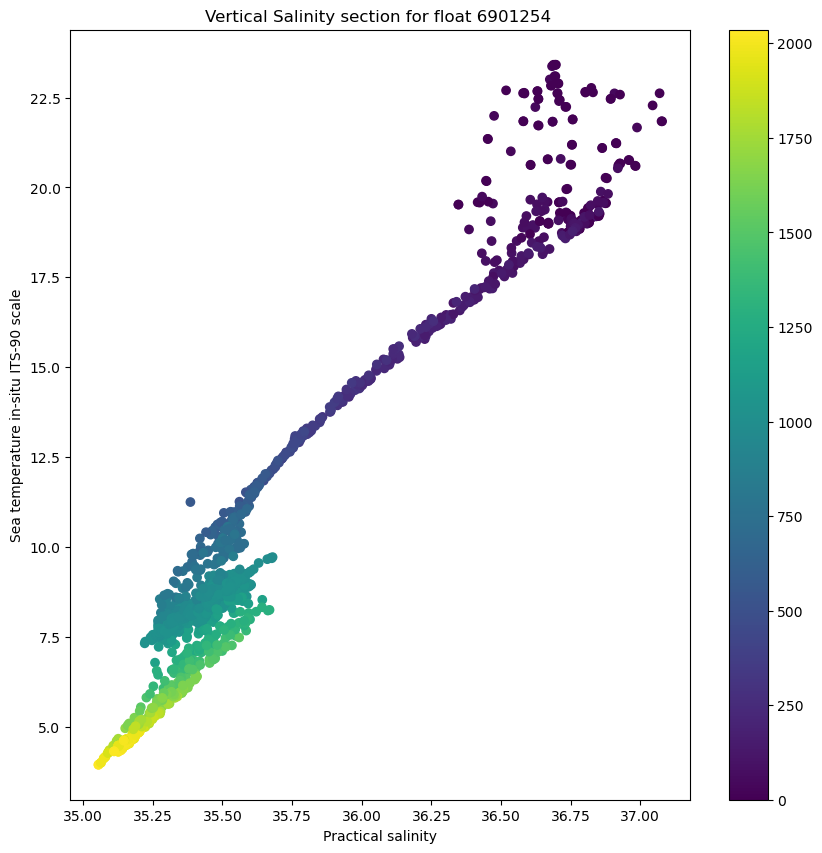

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(Rtraj.PSAL,Rtraj.TEMP,c=Rtraj.PRES)
ax.set_title(f"Vertical Salinity section for float {Rtraj.PLATFORM_NUMBER.astype(str).values}")
ax.set_xlabel(f"{Rtraj.PSAL.long_name}")
ax.set_ylabel(f"{Rtraj.TEMP.long_name}")
fig.colorbar(sc);

and the time-series of temperature, where we can see that most of the observations are at the *parking depth*, 

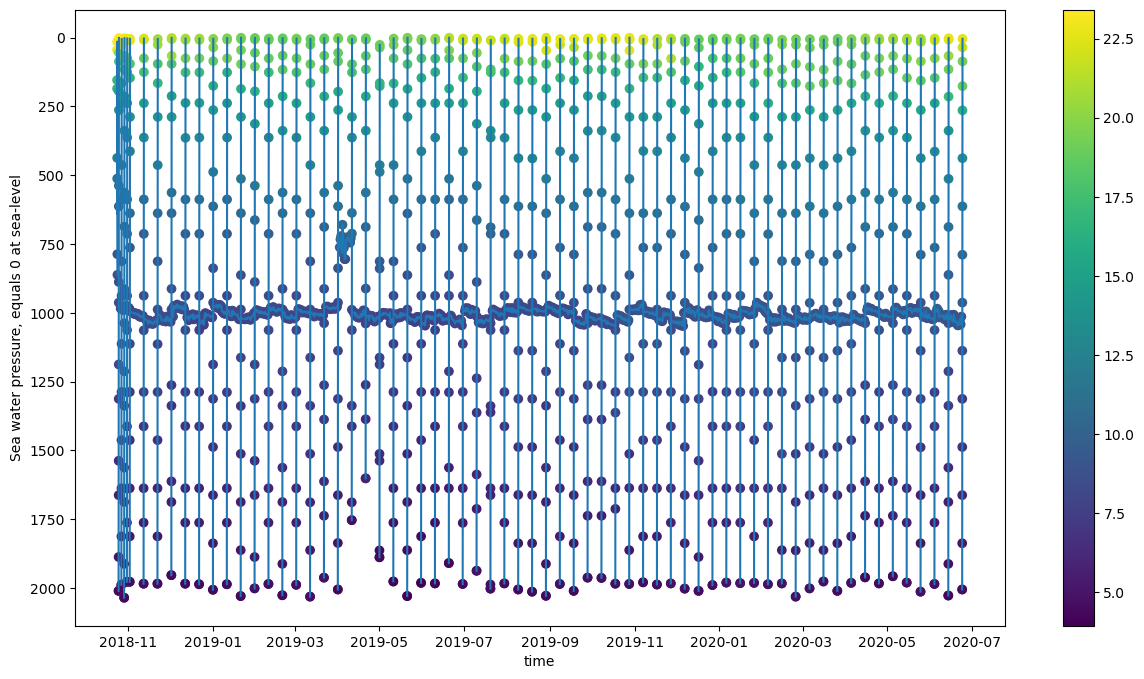

In [7]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.PRES,'-')
sc=ax.scatter(Rtraj.JULD,Rtraj.PRES,c=Rtraj.TEMP)
ax.set_xlabel(f"{Rtraj.JULD.standard_name}")
ax.set_ylabel(f"{Rtraj.PRES.long_name}")
ax.invert_yaxis()
fig.colorbar(sc);

And we can see what observations we have in eacj data point, using the MEASUREMENT_CODE. As indicated in the Ago referente Table 15 of the [Argo user’s manual](https://archimer.ifremer.fr/doc/00187/29825/), we have a few observations with code 901, that correspond to "Grounded flag Configuration phas", in red in the follo

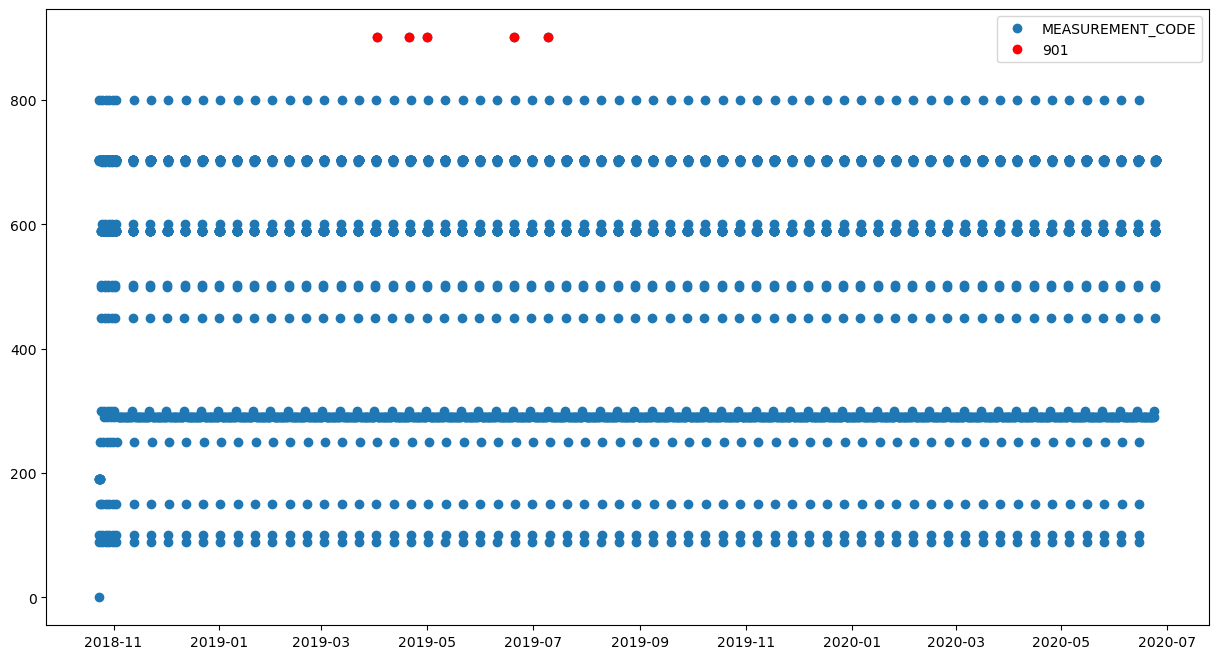

In [8]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.MEASUREMENT_CODE,'o',label='MEASUREMENT_CODE');
ax.plot(Rtraj.JULD[Rtraj.MEASUREMENT_CODE==901],Rtraj.MEASUREMENT_CODE[Rtraj.MEASUREMENT_CODE==901],'ro',label='901');
ax.legend();